In [1]:
import numpy as np
import pandas as pd
from gower.gower_dist import *

In [2]:
df = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})
df

,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [3]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), weight="uniform"))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.12352941 0.25294118 0.37058824 0.5        0.5
 0.62352941 0.75294118 0.87058824 1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [4]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), R=(25, 75)))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.47296293 0.96844791 0.96844791 0.96844791 0.03155209
 0.50451502 1.         1.         1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
5,M,F,15,15
1,M,M,15,36
6,M,F,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


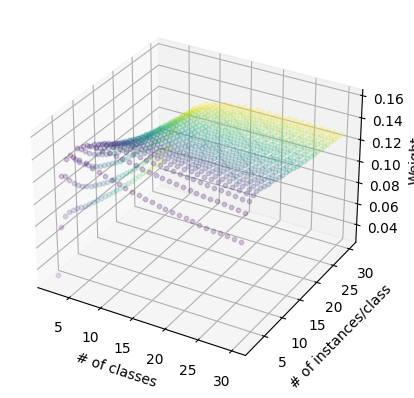

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = mcolors._colors_full_map

ax = plt.axes(projection="3d")

MAX = 30

for i in range(2, MAX + 1):
    X = []
    for j in range(2, MAX + 1):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        ax.scatter3D(i, j, x, alpha=0.9*x+0.1, c=j, s=10, vmin=1, vmax=MAX)
        X.append(x)
ax.set_xlabel("# of classes")
ax.set_ylabel("# of instances/class")
ax.set_zlabel("Weight")

plt.show()


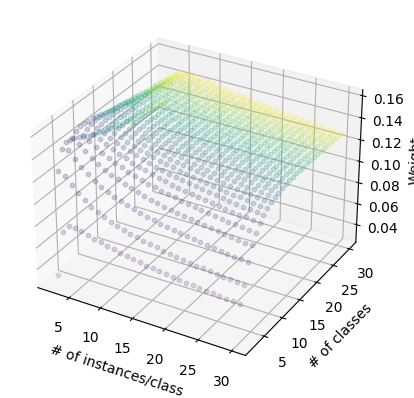

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = mcolors._colors_full_map

ax = plt.axes(projection="3d")

MAX = 30

for i in range(2, MAX + 1):
    X = []
    for j in range(2, MAX + 1):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        ax.scatter3D(j, i, x, alpha=0.9*x+0.1, c=i, s=10, vmin=1, vmax=MAX)
        X.append(x)
ax.set_ylabel("# of classes")
ax.set_xlabel("# of instances/class")
ax.set_zlabel("Weight")

plt.show()


In [7]:
dd = pd.read_csv("dog_adoption/allDogDescriptions.csv", index_col=0)

# get rid of columns with the most destructive nans

def isolate_nans(column):
    all_other_nans = nans[[c for c in cols if c != column]].sum(axis=1)
    mask = all_other_nans < np.median(all_other_nans)
    mask &= nans[column]
    return mask.sum()

nans = dd.isna()
cols = dd.columns
isolated_nans = {c: isolate_nans(c) for c in cols}
median_count = np.median([v for v in isolated_nans.values() if v > 0])
for column, count in isolated_nans.items():
    if count > median_count:
        print(column)
        dd.drop(column, axis=1, inplace=True)
dd.dropna(inplace=True)  # dd.mode().iloc[0]

# make bools strings

is_bool = dd.dtypes == bool
dd.loc[:, is_bool] = dd[dd.columns[is_bool]].astype(str)

breed_secondary
color_primary
color_secondary
color_tertiary
declawed
env_cats


In [8]:
matrix = gower_matrix(dd.to_numpy(), chunksize=20)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13729 [00:00<?, ?it/s]

In [9]:
pd.DataFrame(matrix).describe()

,0,1,2,3,4,5,6,7,8,9,...,13719,13720,13721,13722,13723,13724,13725,13726,13727,13728
count,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,...,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000
mean,0.128058,0.124262,0.125744,0.126760,0.126775,0.126750,0.126760,0.125729,0.126746,0.122502,...,0.204026,0.234322,0.247240,0.254002,0.255552,0.256966,0.286616,0.465872,0.492304,0.537576
std,0.071534,0.071484,0.071493,0.071570,0.071572,0.071569,0.071572,0.071493,0.071571,0.071785,...,0.043285,0.043664,0.043912,0.044080,0.044613,0.045572,0.047467,0.061107,0.062563,0.065024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094044,0.090488,0.091361,0.092467,0.092428,0.092456,0.092414,0.091346,0.092453,0.090090,...,0.191182,0.223980,0.238219,0.245261,0.246170,0.247456,0.278248,0.462923,0.489709,0.535358
50%,0.103856,0.100392,0.101594,0.102629,0.102562,0.102616,0.102543,0.101580,0.102611,0.099285,...,0.212252,0.247796,0.261488,0.269163,0.268503,0.272244,0.303481,0.488026,0.514909,0.560314
75%,0.129031,0.125607,0.127030,0.127955,0.127956,0.127979,0.127942,0.126966,0.127978,0.124933,...,0.226063,0.258474,0.271936,0.278884,0.282366,0.284074,0.315503,0.498720,0.525456,0.571503
max,0.995628,0.996346,0.997362,0.996346,0.995516,0.996332,0.995502,0.997348,0.996332,0.994785,...,0.855072,0.823928,0.807238,0.800316,0.794883,0.795154,0.763539,0.582028,0.553900,0.578862


In [10]:
matrix

array([[0.        , 0.04665661, 0.04564014, ..., 0.50671933, 0.53134283,
        0.57500823],
       [0.04665661, 0.        , 0.04169873, ..., 0.50258998, 0.53027935,
        0.57607162],
       [0.04564014, 0.04169873, 0.        , ..., 0.50341946, 0.53129583,
        0.5750551 ],
       ...,
       [0.50671933, 0.50258998, 0.50341946, ..., 0.        , 0.10769301,
        0.15266627],
       [0.53134283, 0.53027935, 0.53129583, ..., 0.10769301, 0.        ,
        0.0936211 ],
       [0.57500823, 0.57607162, 0.5750551 , ..., 0.15266627, 0.0936211 ,
        0.        ]])

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, metric="precomputed")
dd["gower_dbscan"] = dbscan.fit_predict(matrix)

In [12]:
np.unique(dd["gower_dbscan"], return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

In [13]:
dd["label_count"] = dd.groupby("gower_dbscan").transform("count").iloc[:, 0]
dd.sort_values(["gower_dbscan", "label_count"], ascending=[True, False], inplace=True)
dd

,id,org_id,url,type.x,species,breed_primary,breed_mixed,breed_unknown,age,sex,...,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description,gower_dbscan,label_count
index,,,,,,,,,,,,,,,,,,,,,
39,46034532,NV129,https://www.petfinder.com/dog/bella-46034532/n...,Dog,Dog,Labrador Retriever,True,False,Young,Female,...,Las Vegas,NV,89101,US,89009,2019-09-20,Dog,Bella is a 1 year old Lab/Doxie mix weighing 3...,-1,5584
61,46027804,NV186,https://www.petfinder.com/dog/vail-46027804/nv...,Dog,Dog,Husky,False,False,Baby,Female,...,Las Vegas,NV,89104,US,89009,2019-09-20,Dog,Vail came to us due to resource guarding issue...,-1,5584
71,46026170,NV68,https://www.petfinder.com/dog/taquito-46026170...,Dog,Dog,Chihuahua,False,False,Young,Male,...,Mesquite,NV,89024,US,89009,2019-09-20,Dog,This handsome fellow is Taquito (little Taco) ...,-1,5584
117,45982553,NV59,https://www.petfinder.com/dog/chocolate-459825...,Dog,Dog,Schnauzer,True,False,Baby,Female,...,Las Vegas,NV,89123,US,89009,2019-09-20,Dog,Chocolate is a 4 month old schnauzer/terrier m...,-1,5584
156,45948988,AZ91,https://www.petfinder.com/dog/minnie-45948988/...,Dog,Dog,Cattle Dog,True,False,Young,Female,...,Kingman,AZ,86401,US,89009,2019-09-20,Dog,She is the sweetest girl. Wants attention and ...,-1,5584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57681,45787721,VA36,https://www.petfinder.com/dog/molly-45787721/v...,Dog,Dog,Beagle,True,False,Senior,Female,...,Fincastle,VA,24090,US,WV,2019-09-20,Dog,Molly was adopted from the LAP many years ago ...,304,7
57752,45533942,VA36,https://www.petfinder.com/dog/jane-45533942/va...,Dog,Dog,Beagle,False,False,Adult,Female,...,Fincastle,VA,24090,US,WV,2019-09-20,Dog,Jane is a chunky adorable monkey. She is eigh...,304,7
57848,45115403,VA36,https://www.petfinder.com/dog/benji-45115403/v...,Dog,Dog,Beagle,True,False,Senior,Male,...,Fincastle,VA,24090,US,WV,2019-09-20,Dog,"Benji came to The LAP on June 20, 2019 from Ru...",304,7


In [14]:
pokemon = pd.read_csv("pokemon/pokemon_alopez247.csv")

for c in pokemon.columns[pokemon.dtypes != object]:
    pokemon.loc[pokemon[c].isna(), c] = np.nanmedian(pokemon[c])
for c in pokemon.columns[pokemon.dtypes == object]:
    pokemon.loc[pokemon[c].isna(), c] = "none"

matrix2 = gower_matrix(pokemon.to_numpy(), chunksize=20)
print(matrix2)
pokemon["gower_dbscan"] = dbscan.fit_predict(matrix2)
np.unique(pokemon["gower_dbscan"], return_counts=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/721 [00:00<?, ?it/s]

[[0.         0.04783145 0.13314333 ... 0.24227088 0.24543127 0.28008004]
 [0.04783145 0.         0.08585124 ... 0.21933159 0.20898834 0.23278795]
 [0.13314333 0.08585124 0.         ... 0.21824293 0.19856545 0.17148115]
 ...
 [0.24227088 0.21933159 0.21824293 ... 0.         0.09222532 0.11796966]
 [0.24543127 0.20898834 0.19856545 ... 0.09222532 0.         0.09623227]
 [0.28008004 0.23278795 0.17148115 ... 0.11796966 0.09623227 0.        ]]


(array([-1,  0,  1,  2,  3]), array([373, 330,   6,   8,   4]))

In [15]:
pokemon["label_count"] = pokemon.groupby("gower_dbscan").transform("count").iloc[:, 0]
pokemon.sort_values(["gower_dbscan", "label_count"], ascending=[True, False], inplace=True)
pokemon


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,gower_dbscan,label_count
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,...,0.50,Bug,none,True,0.99,29.5,45,four_wings,-1,373
22,23,Ekans,Poison,none,288,35,60,44,40,54,...,0.50,Field,Dragon,False,2.01,6.9,255,serpentine_body,-1,373
23,24,Arbok,Poison,none,438,60,85,69,65,79,...,0.50,Field,Dragon,False,3.51,65.0,90,serpentine_body,-1,373
27,28,Sandslash,Ground,none,450,75,100,110,45,55,...,0.50,Field,none,False,0.99,29.5,90,bipedal_tailed,-1,373
28,29,Nidoran♀,Poison,none,275,55,47,52,40,40,...,0.00,Monster,Field,False,0.41,7.0,235,quadruped,-1,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,Victini,Psychic,Fire,600,100,100,100,100,100,...,0.50,Undiscovered,none,False,0.41,4.0,3,bipedal_tailless,2,8
194,195,Quagsire,Water,Ground,430,95,85,85,65,65,...,0.50,Water_1,Field,False,1.40,75.0,90,bipedal_tailed,3,4
209,210,Granbull,Fairy,none,450,90,120,75,60,60,...,0.25,Field,Fairy,False,1.40,48.7,75,bipedal_tailed,3,4
220,221,Piloswine,Ice,Ground,450,100,100,80,60,60,...,0.50,Field,none,False,1.09,55.8,75,quadruped,3,4


We can also use the categorical weight function to measure the performance of clustering algorithms.


In [16]:
get_cat_weight(dd["gower_dbscan"].astype(str))


0.9999146091338768

In [17]:
get_cat_weight(pokemon["gower_dbscan"].astype(str))


0.12265397019592265